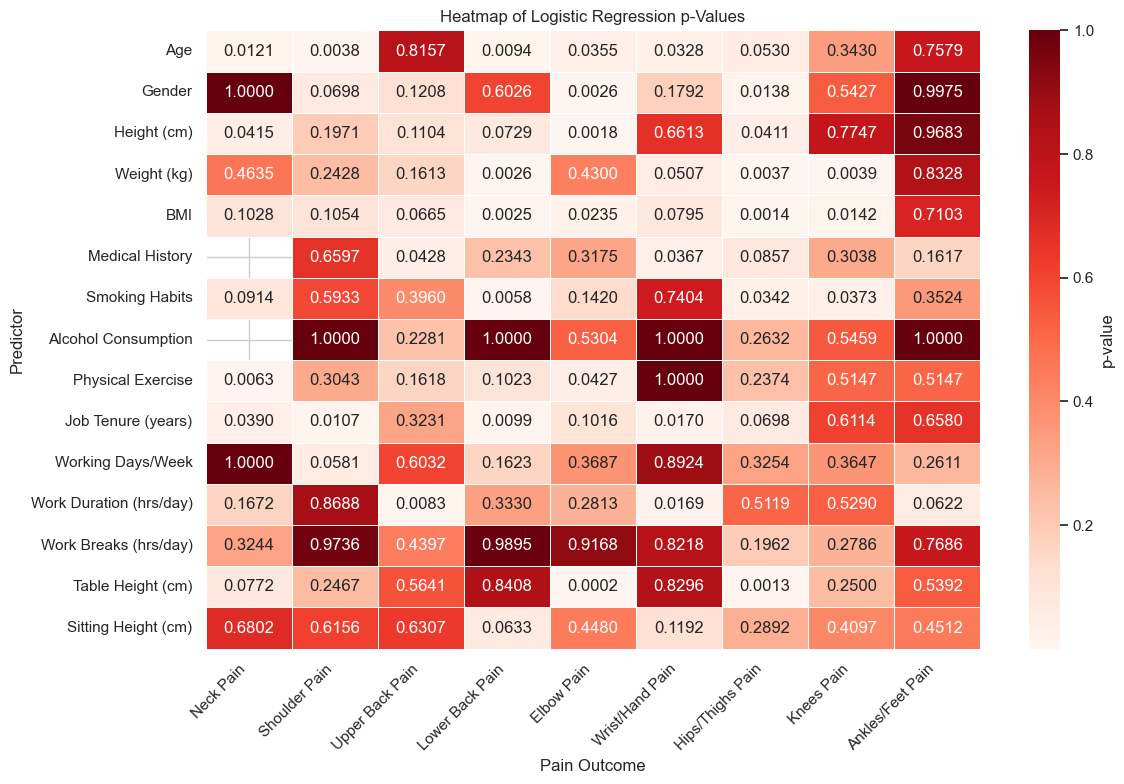

In [8]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# 1. Load the p-values data 
df = pd.read_excel("p-values.xlsx", sheet_name="Sheet1", index_col=0)

# 2. Create a heatmap 
plt.figure(figsize=(12, 8)) 
sns.heatmap( 
    df, 
    annot=True, 
    fmt=".4f", 
    cmap="Reds", 
    cbar_kws={"label": "p-value"}, 
    linewidths=0.5, 
    #linecolor="gray" 
) 

# 3. Customize plot 
plt.title("Heatmap of Logistic Regression p-Values") 
plt.ylabel("Predictor") 
plt.xlabel("Pain Outcome") 
plt.yticks(rotation=0) 
plt.xticks(rotation=45, ha="right") 

# 4. Save the heatmap as a PNG image
#plt.savefig("pvalues_heatmap23.png", format="png", dpi=300)

# 5. Show the heatmap 
plt.tight_layout() 
plt.show() 


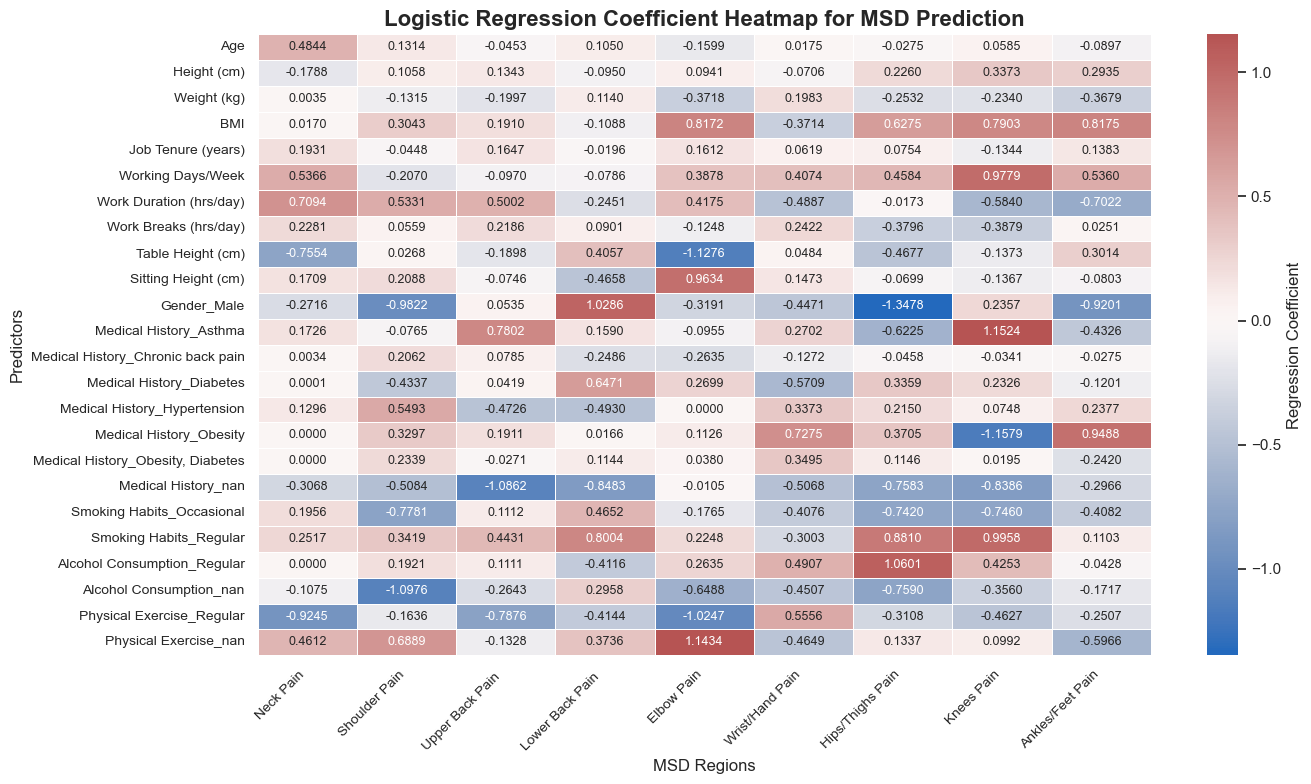

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the logistic regression coefficient matrix from Excel
file_path = "Logistic_Regression_Coefficient_B_Matrix.xlsx"  # Replace with your path if different
coef_df = pd.read_excel(file_path, index_col=0)

# 2. Set the figure size and styling
plt.figure(figsize=(14, 8))
sns.set(font_scale=1)  # Adjust text size
sns.set_style("whitegrid")  # Clean background for publication

# 3. Generate heatmap
ax = sns.heatmap(
    coef_df,
    annot=True,
    fmt=".4f",
    cmap="vlag",  # Blue-White-Red diverging color map
    center=0,  # Center at zero for intuitive interpretation
    linewidths=0.5,
    cbar_kws={'label': 'Regression Coefficient'},
    annot_kws={"size": 9}
)

# 4. Set labels and title
plt.title("Logistic Regression Coefficient Heatmap for MSD Prediction", fontsize=16, weight='bold')
plt.ylabel("Predictors", fontsize=12)
plt.xlabel("MSD Regions", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# 5. Layout optimization
plt.tight_layout()

# 6. Show or save the figure
plt.savefig("MSD_Coefficient_Heatmap_Q1_Ready.png", dpi=300)  # Optional: Save as high-res PNG
plt.show()


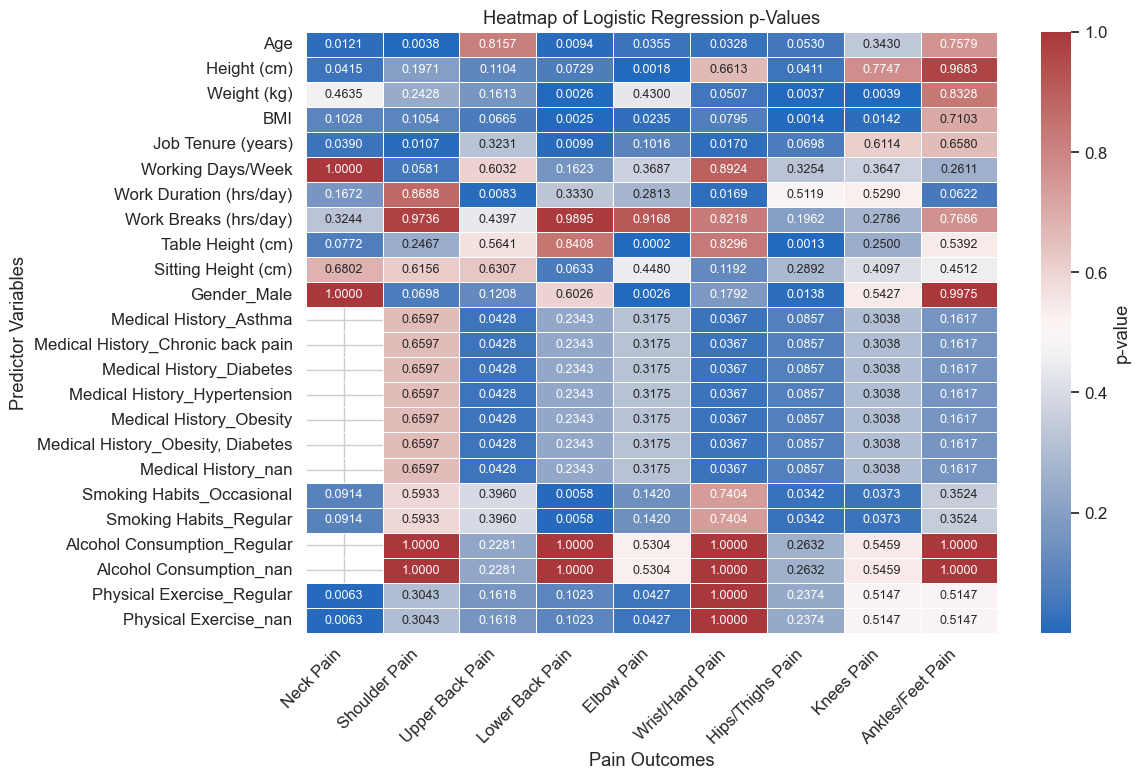

In [92]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

# 1. Load the p-values data  
df = pd.read_excel("p-values_1.xlsx", sheet_name="Sheet1", index_col=0) 

# 2. Create a heatmap  
plt.figure(figsize=(12, 8))  
sns.heatmap(  
    df,  
    annot=True,         # Display p-values in cells  
    fmt=".4f",          # Format to 4 decimal places  
    #cmap="Reds_r",        # Red color map
    cmap="vlag",
    #center=0,  # Center at zero for intuitive interpretation
    cbar_kws={"label": "p-value"},  
    linewidths=0.5,     # Add lines between cells  
    #linecolor="gray",  
    mask=df.isnull(),   # Hide NaNs if any  
    annot_kws={"size": 9},
)  

# 3. Customize the plot  
plt.title("Heatmap of Logistic Regression p-Values")  
plt.ylabel("Predictor Variables")  
plt.xlabel("Pain Outcomes")  
plt.yticks(rotation=0)  
plt.xticks(rotation=45, ha="right")  

# 4. Adjust layout and show plot  
plt.tight_layout()  
plt.show()  

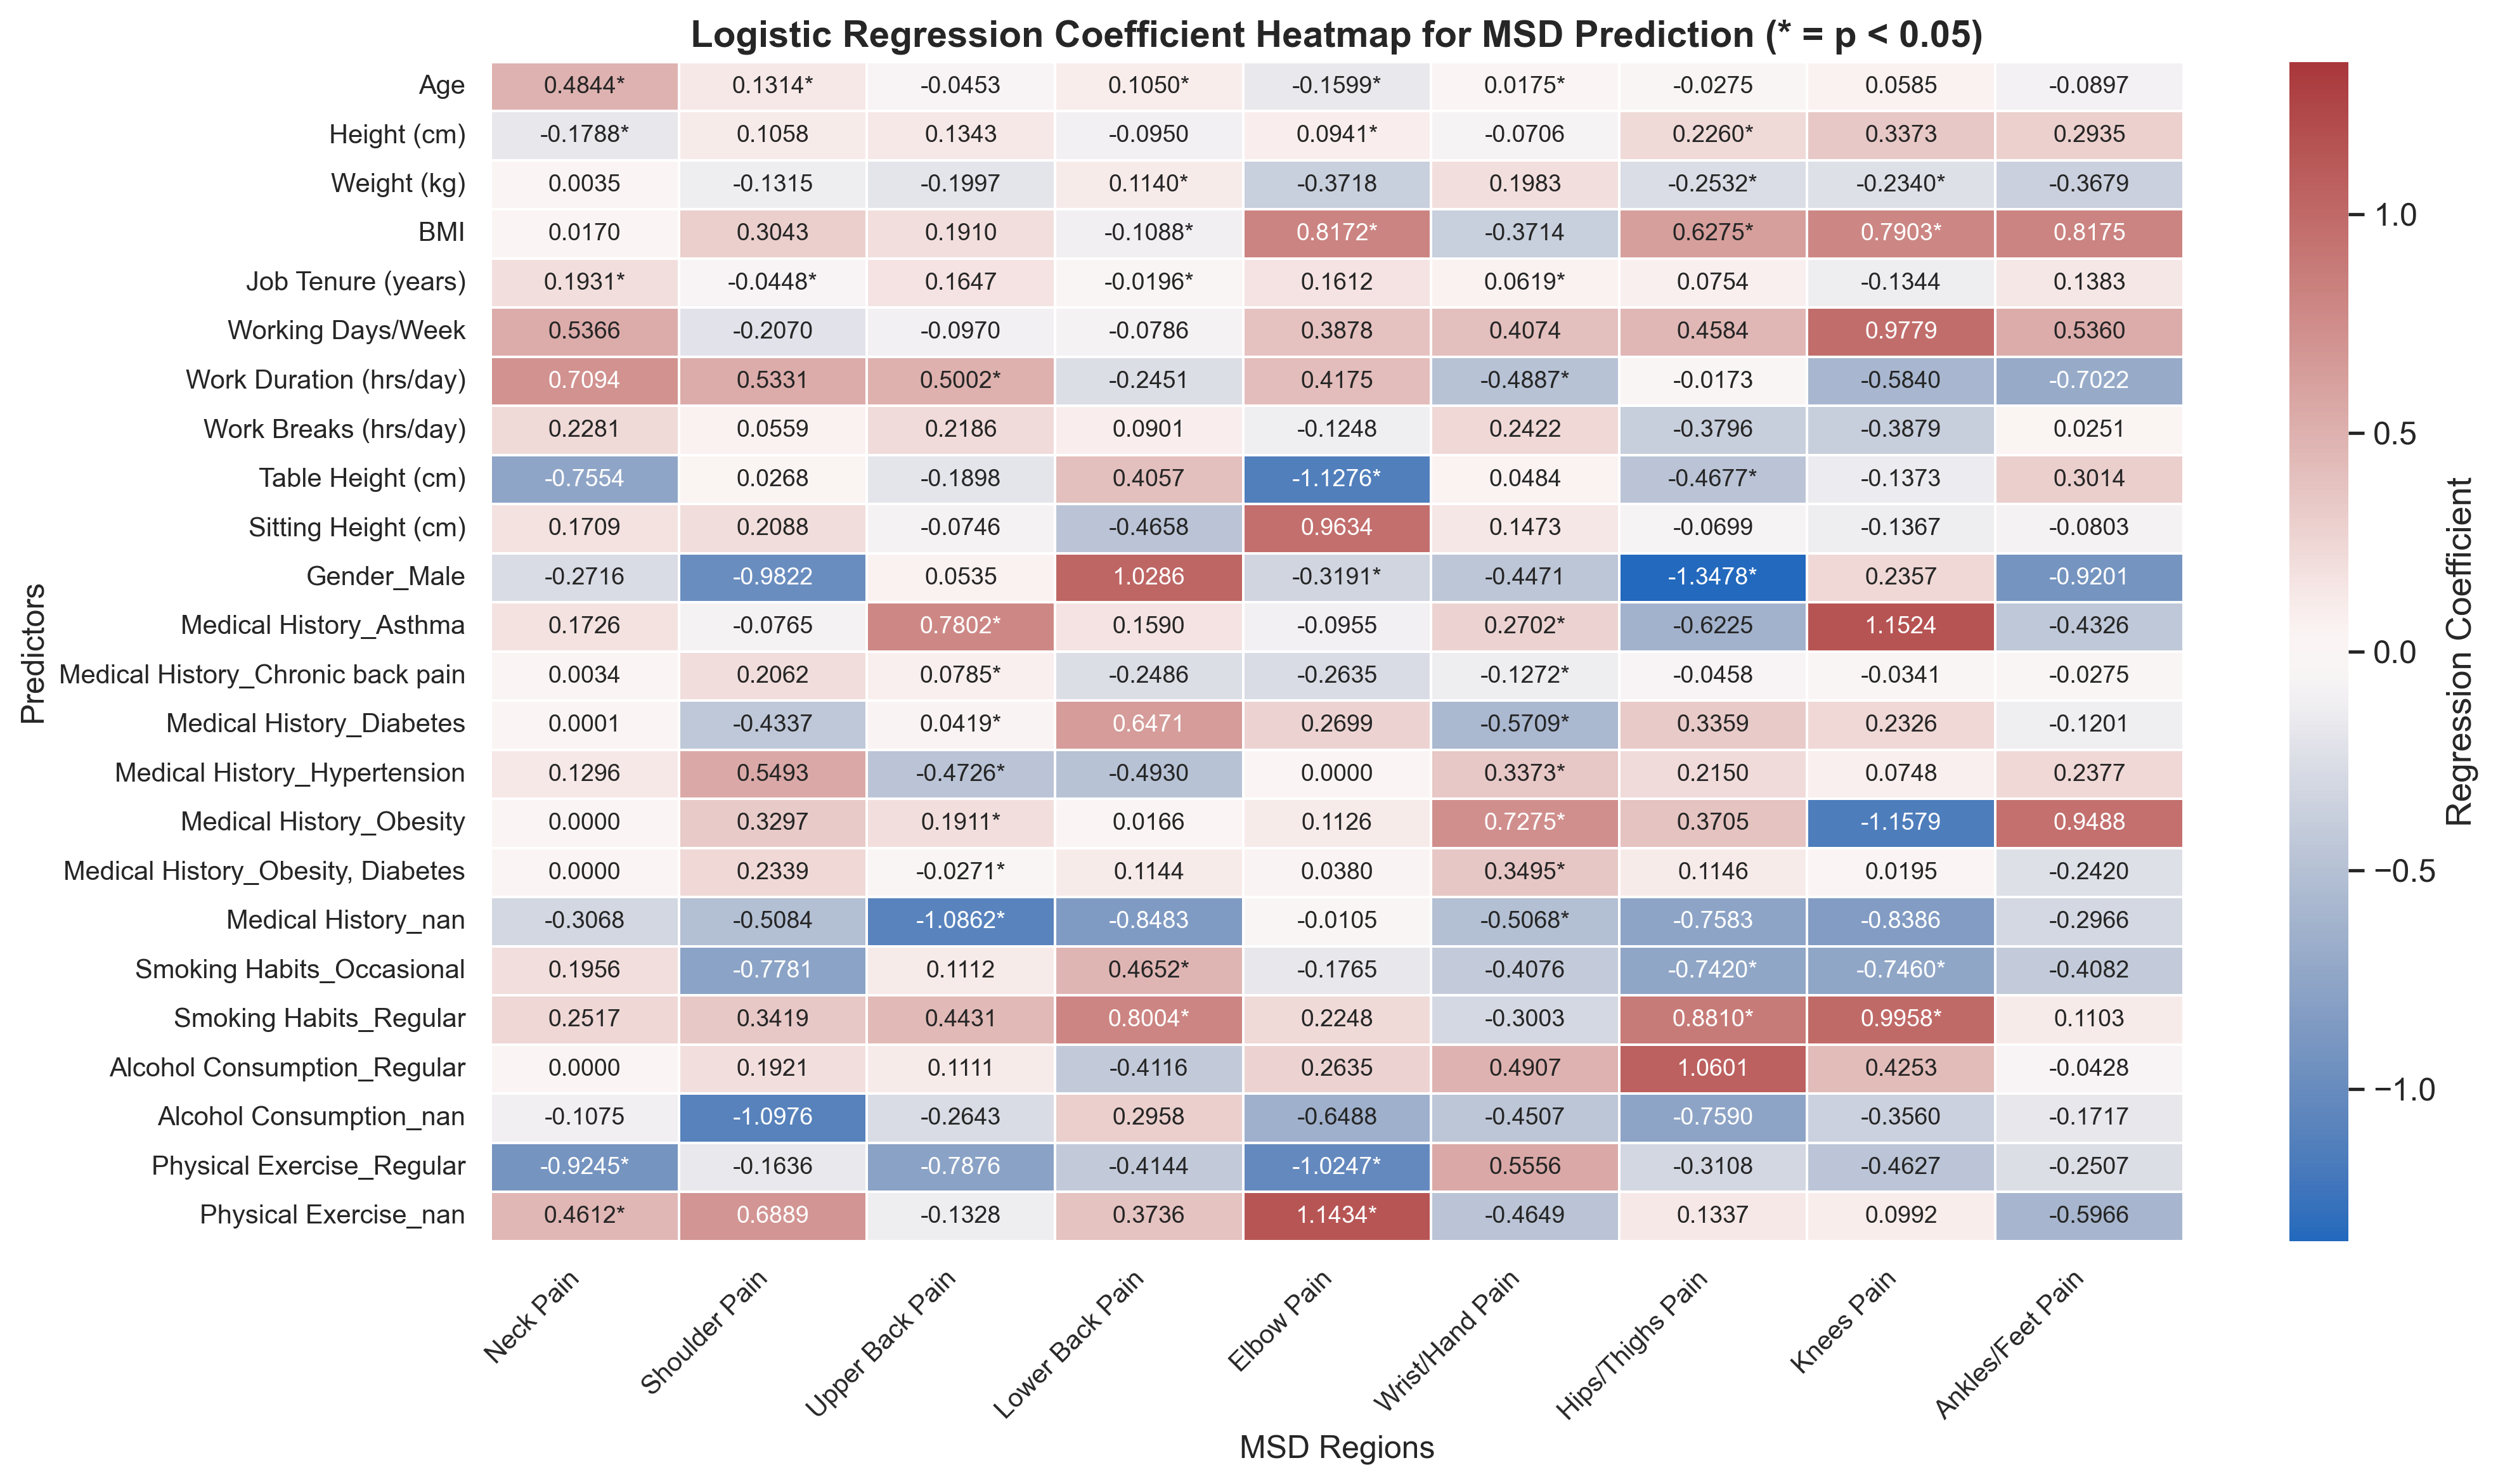

In [108]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
 
# --- Step 1: Load Coefficient and p-value Data --- 
coef_df = pd.read_excel("Logistic_Regression_Coefficient_B_Matrix.xlsx", index_col=0) 
pval_df = pd.read_excel("p-values_1.xlsx", index_col=0) 
 
# --- Step 2: Clean Column and Row Labels --- 
coef_df.columns = coef_df.columns.str.strip() 
coef_df.index = coef_df.index.str.strip() 
pval_df.columns = pval_df.columns.str.strip() 
pval_df.index = pval_df.index.str.strip() 
 
# --- Step 3: Create Annotation Matrix with '*' for p < 0.05 --- 
annot_df = coef_df.copy().astype(str) 

for row in coef_df.index: 
    for col in coef_df.columns: 
        coef_value = coef_df.loc[row, col] 
        if pd.notna(coef_value): 
            annotation = f"{coef_value:.4f}" 
            try: 
                if pval_df.loc[row, col] < 0.05: 
                    annotation += "*" 
            except KeyError: 
                pass  # Skip if column-row mismatch 
            annot_df.loc[row, col] = annotation 
        else: 
            annot_df.loc[row, col] = "" 
 
# --- Step 4: Plot the Heatmap with 
plt.figure(figsize=(14, 8), dpi=300) 
sns.set(font_scale=1.1) 
sns.set_style("whitegrid") 

# Find max absolute value for symmetric color range
vmax = coef_df.abs().max().max()

ax = sns.heatmap( 
    coef_df, 
    annot=annot_df, 
    fmt="", 
    cmap="vlag",              # Good diverging colormap for +/- values 
    #cmap="BrBG",
    #center= -.25,                 # Center at zero
    center= 0,
    vmin=-vmax, vmax=vmax,   # Symmetric range for color mapping
    linewidths=0.5, 
    cbar_kws={'label': 'Regression Coefficient'}, 
    annot_kws={"size": 9} 
) 
 
# --- Step 5: Add Labels and Save --- 
plt.title("Logistic Regression Coefficient Heatmap for MSD Prediction (* = p < 0.05)", fontsize=14, weight='bold') 
plt.ylabel("Predictors", fontsize=12) 
plt.xlabel("MSD Regions", fontsize=12) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 
 
plt.tight_layout() 
plt.savefig("MSD_Coefficient_Heatmap_with_Significance.png", dpi=600) 
plt.show()


In [93]:
import pandas as pd

# --- Load original coefficient and p-value matrices ---
coef_df = pd.read_excel("Logistic_Regression_Coefficient_B_Matrix.xlsx", index_col=0)
pval_df = pd.read_excel("p-values_1.xlsx", index_col=0)

# --- Clean up labels ---
coef_df.columns = coef_df.columns.str.strip()
coef_df.index = coef_df.index.str.strip()
pval_df.columns = pval_df.columns.str.strip()
pval_df.index = pval_df.index.str.strip()

# --- Create annotated DataFrame with "*" for significant p-values ---
annotated_df = coef_df.copy().astype(str)

for row in coef_df.index:
    for col in coef_df.columns:
        coef_value = coef_df.loc[row, col]
        if pd.notna(coef_value):
            cell_text = f"{coef_value:.4f}"
            try:
                if pval_df.loc[row, col] < 0.05:
                    cell_text += "*"
            except KeyError:
                pass
            annotated_df.loc[row, col] = cell_text
        else:
            annotated_df.loc[row, col] = ""

# --- Save the annotated DataFrame to a new Excel file ---
output_path = "Annotated_Logistic_Regression_Coefficients.xlsx"
annotated_df.to_excel(output_path)

print(f"✅ Annotated Excel file saved to: {output_path}")


✅ Annotated Excel file saved to: Annotated_Logistic_Regression_Coefficients.xlsx


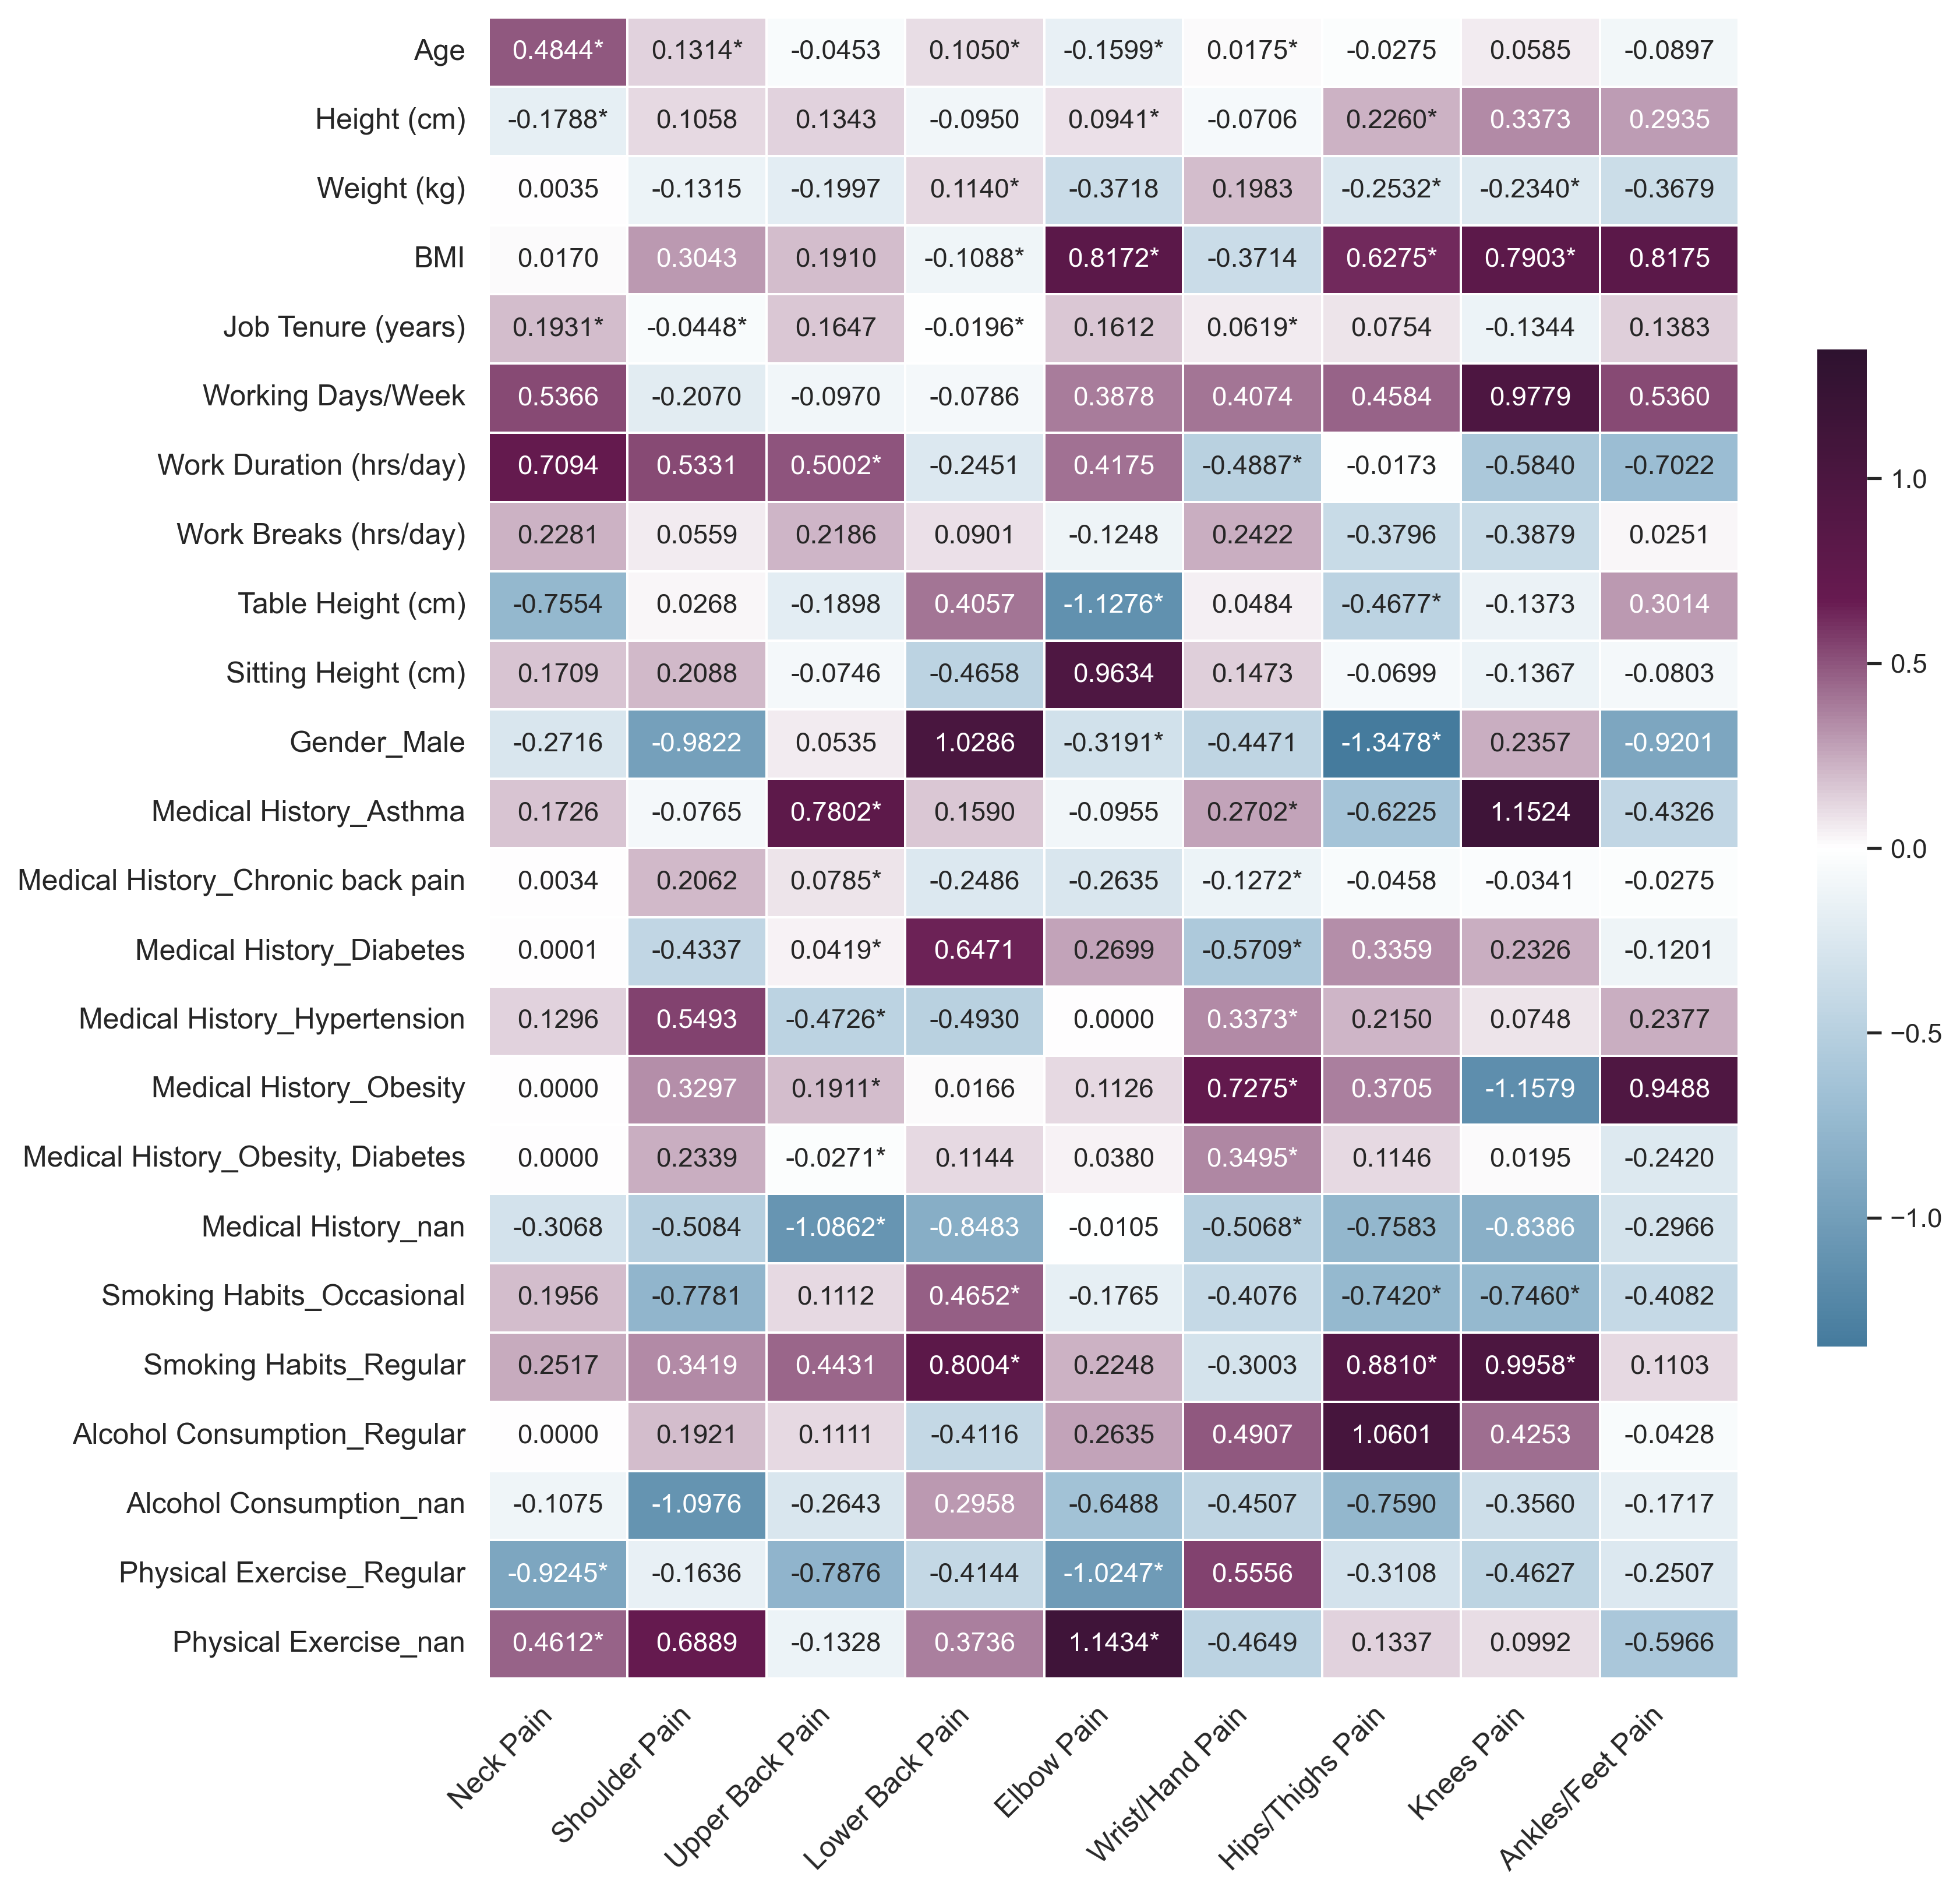

In [19]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap

# --- Step 1: Load Coefficient and p-value Data ---  
coef_df = pd.read_excel("Logistic_Regression_Coefficient_B_Matrix.xlsx", index_col=0)  
pval_df = pd.read_excel("p-values_1.xlsx", index_col=0)  
  
# --- Step 2: Clean Column and Row Labels ---  
coef_df.columns = coef_df.columns.str.strip()  
coef_df.index = coef_df.index.str.strip()  
pval_df.columns = pval_df.columns.str.strip()  
pval_df.index = pval_df.index.str.strip()  
  
# --- Step 3: Create Annotation Matrix with '*' for p < 0.05 ---  
annot_df = coef_df.copy().astype(str)  
 
for row in coef_df.index:  
    for col in coef_df.columns:  
        coef_value = coef_df.loc[row, col]  
        if pd.notna(coef_value):  
            annotation = f"{coef_value:.4f}"  
            try:  
                if pval_df.loc[row, col] < 0.05:  
                    annotation += "*"  
            except KeyError:  
                pass  # Skip if column-row mismatch  
            annot_df.loc[row, col] = annotation  
        else:  
            annot_df.loc[row, col] = ""  

# --- Step 4: Create Custom Colormap ---  
#custom_colors = ["#457B9D", "#FFFFFF", "#F4A261"]  # Blue → White → Orange
#custom_colors = ["#2e122f", "#671a50", "#a91f61", "#e33645", "#f2744d", "#f9b28a"]
#custom_colors = ["#f9b28a", "#f2744d", "#a91f61", "#671a50", "#2e122f"]
custom_colors = ["#457B9D", "#9FC0D5", "#FFFFFF", "#671a50", "#2e122f"]
custom_cmap = LinearSegmentedColormap.from_list("custom_vlag", custom_colors, N=256)  

# --- Step 5: Plot the Heatmap ---  
plt.figure(figsize=(12, 11), dpi=300)  
sns.set(font_scale=1)  
sns.set_style("whitegrid")  

vmax = coef_df.abs().max().max()  # For symmetric range  

ax = sns.heatmap(  
    coef_df,  
    annot=annot_df,  
    fmt="",  
    cmap=custom_cmap,  
    center=0,  
    vmin=-vmax, vmax=vmax,  
    linewidths=0.5,  
    #cbar_kws={'label': 'Regression Coefficient'}, 
    cbar_kws={'shrink': 0.6},
    annot_kws={"size": 11}  
)  
  
# --- Step 6: Add Labels and Save ---  
#plt.title("Logistic Regression Coefficient Heatmap for MSD Prediction (* = p < 0.05)", fontsize=14, weight='bold')  
#plt.ylabel("Predictors", fontsize=12)  
#plt.xlabel("MSD Regions", fontsize=12)  
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
  
plt.tight_layout()  
plt.savefig("MSD_Coefficient_Heatmap_with_Custom_Colors11.png", dpi=600)  
plt.show()


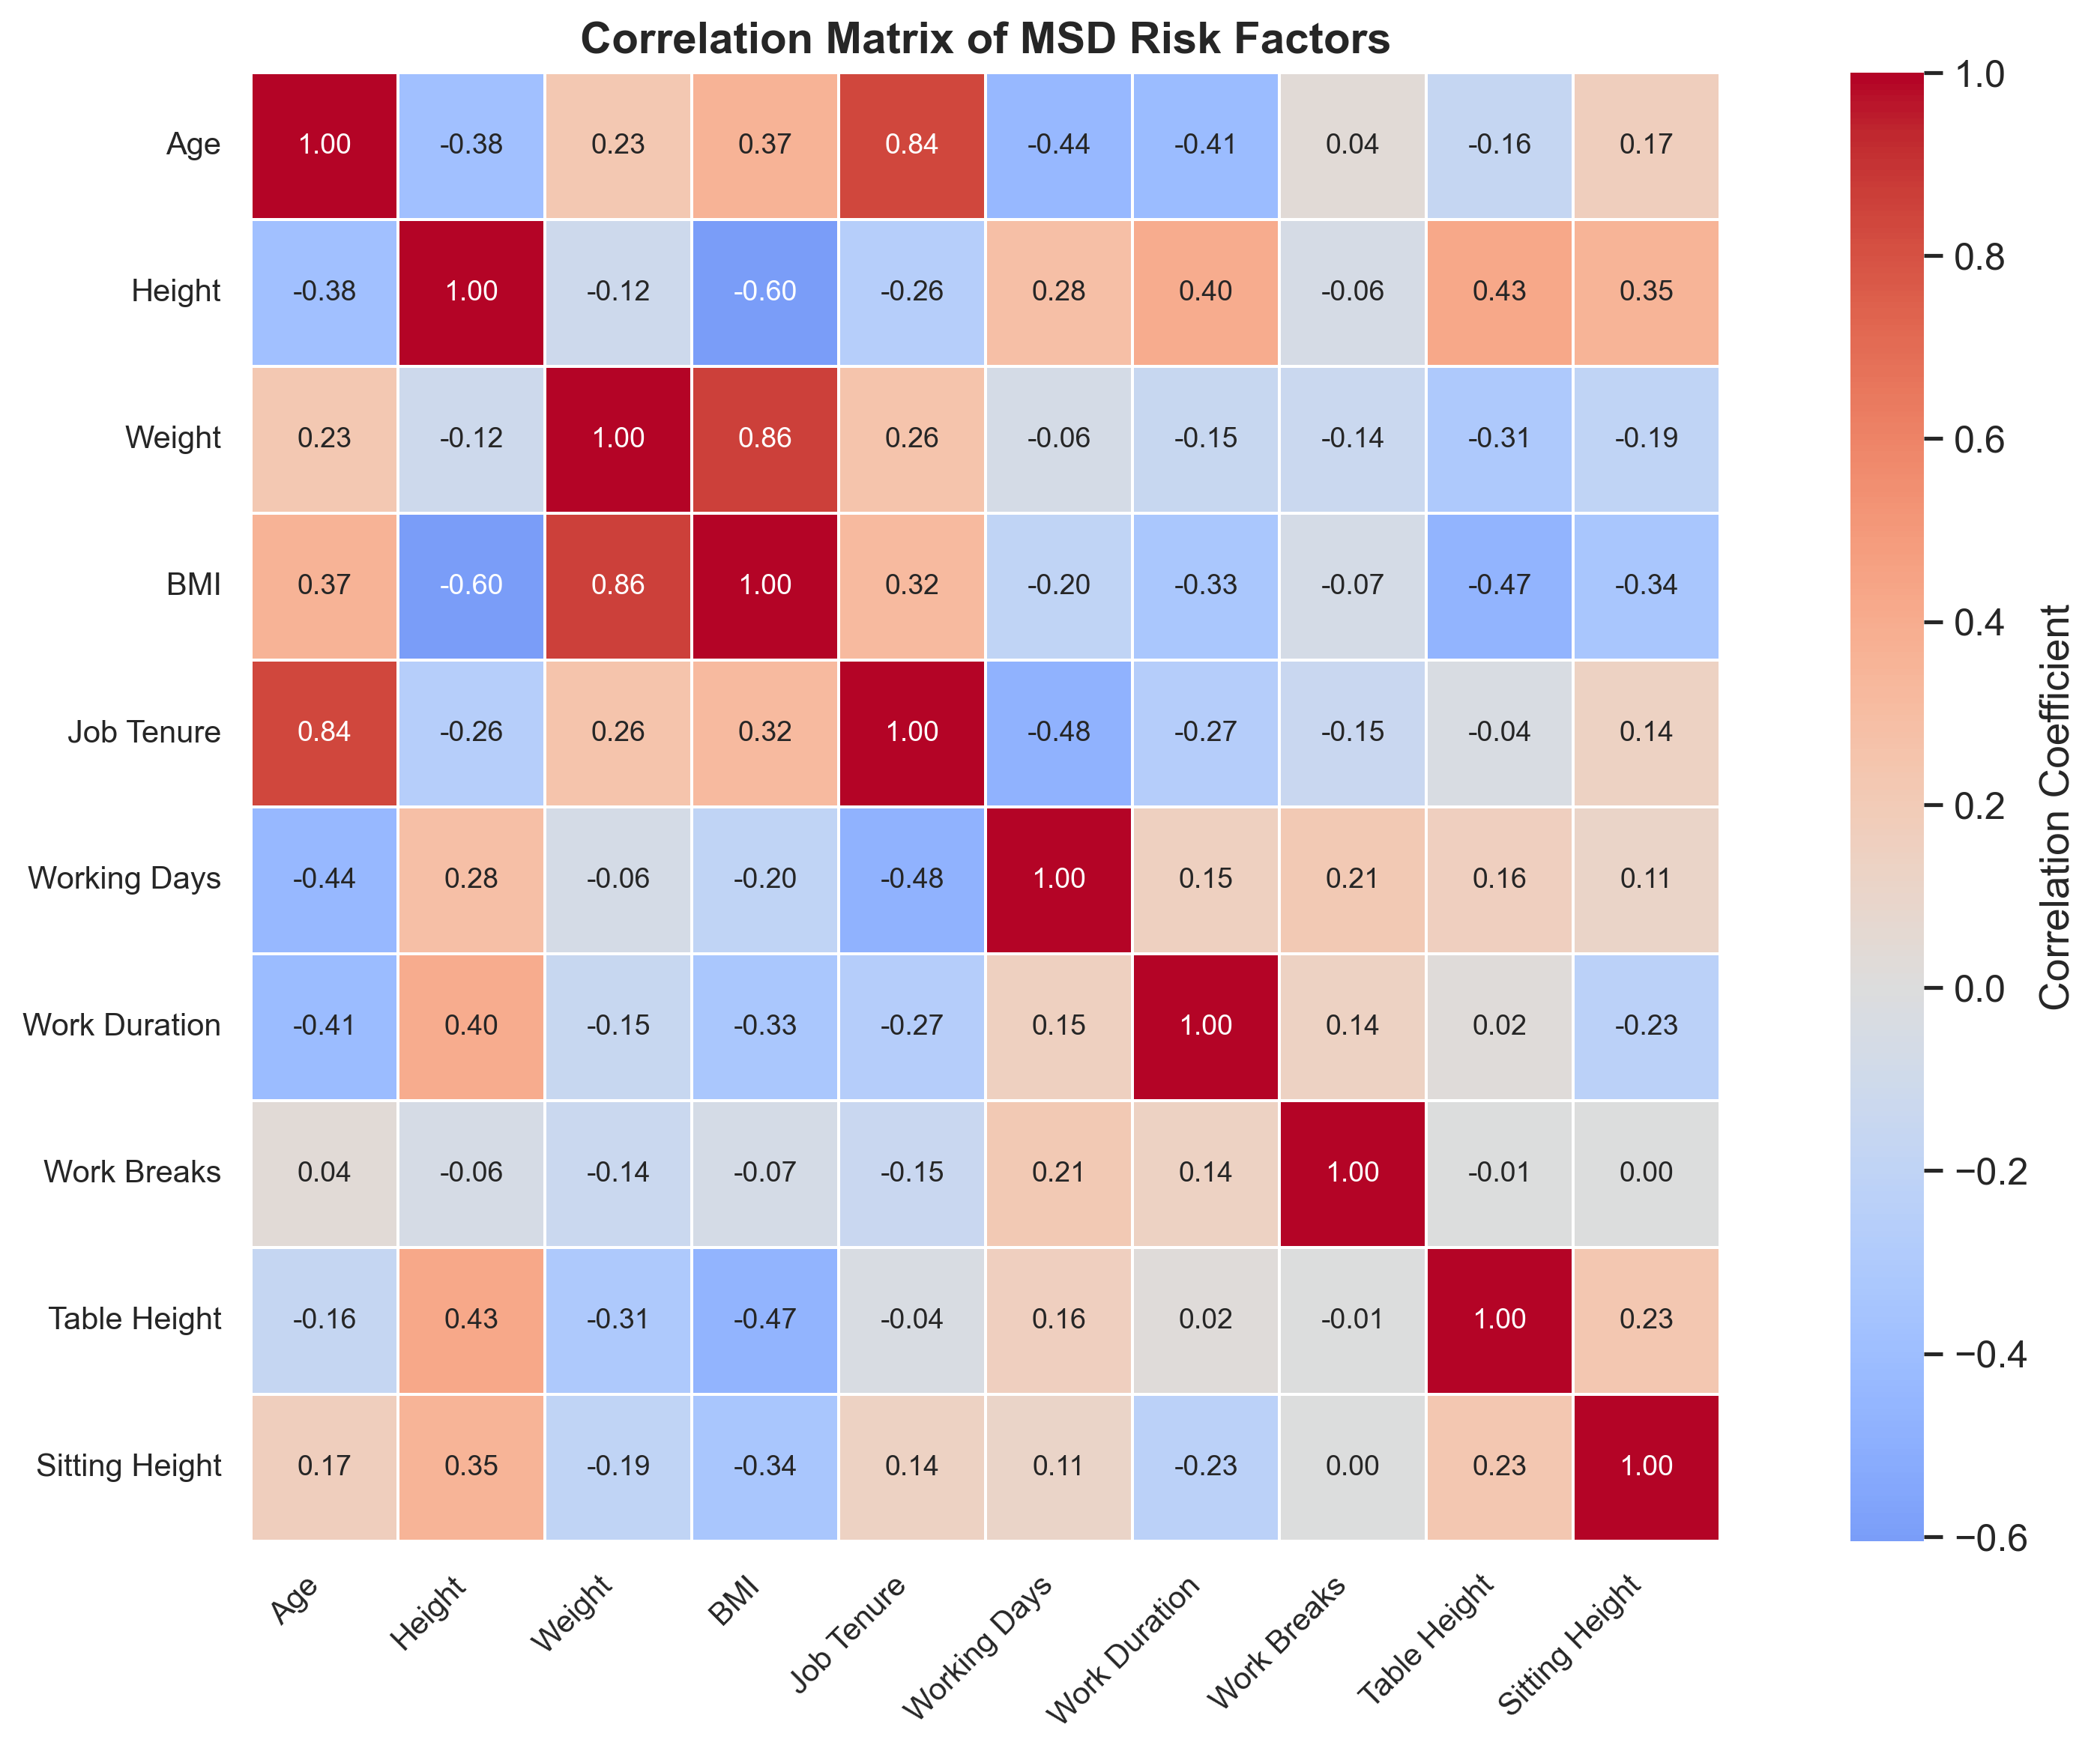

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load the Excel File ---
df = pd.read_excel("MSDs Risk - Data.xlsx")

# --- Step 2: Select the Numeric Attributes Only ---
attributes = [
    'Age', 'Height', 'Weight', 'BMI', 'Job Tenure',
    'Working Days', 'Work Duration', 'Work Breaks',
    'Table Height', 'Sitting Height'
]

# --- Step 3: Extract Relevant Columns ---
data = df[attributes].copy()

# --- Step 4: Compute the Correlation Matrix ---
corr_matrix = data.corr(method='pearson')  # or method='spearman' if needed

# --- Step 5: Plot the Correlation Heatmap ---
plt.figure(figsize=(12, 8), dpi=300)
sns.set(style="whitegrid", font_scale=1.1)

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",   # You can replace with a custom cmap
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"},
    annot_kws={"size": 9}
)

# --- Step 6: Finalize Plot ---
plt.title("Correlation Matrix of MSD Risk Factors", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("MSD_Correlation_Matrix.png", dpi=600)
plt.show()
